# Find relevant tracts

For each department, we will find which tracts intersect with it

In [19]:
import matplotlib.pyplot as plt

from cpe_help import Census, list_departments

In [27]:
dept_lst = list_departments()
dept = dept_lst[0]
dept

# Boston - Massachusetts

Department('11-00091')

In [12]:
census = Census()
census

## Load department data

In [5]:
dept.load_guessed_state()

'25'

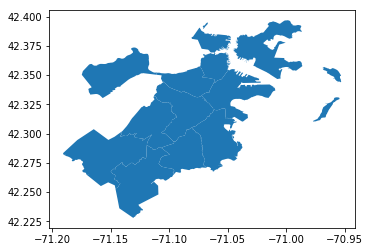

In [7]:
police_districts = dept.load_preprocessed_shapefile()
police_districts.plot()

In [8]:
police_districts.crs

# add no_defs

{'init': 'epsg:4326'}

## Load census data

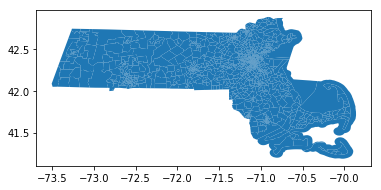

In [32]:
tracts = census.load_tract_boundaries('25')
tracts = tracts.set_index('GEOID')
tracts.plot()

In [15]:
tracts.crs

{'init': 'epsg:4269'}

## Prepare CRS

In [17]:
police_districts = police_districts.to_crs(tracts.crs)

## Visualize overlay

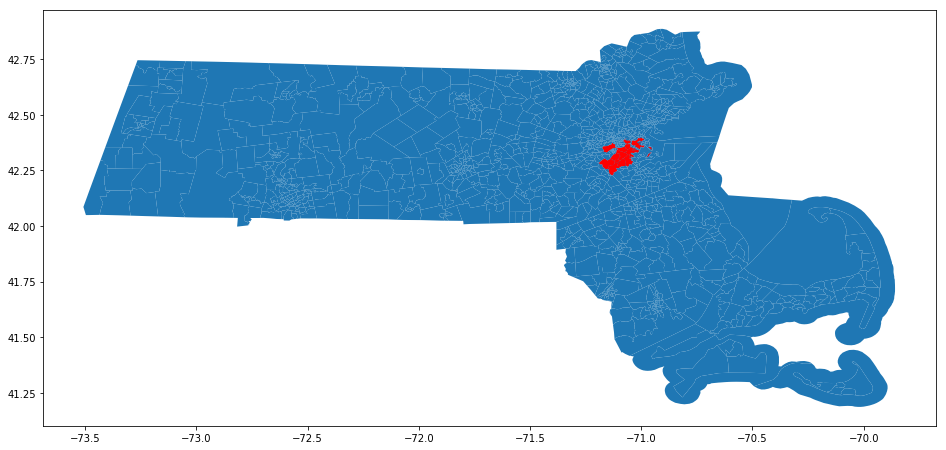

In [21]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.set_aspect('equal')

tracts.plot(ax=ax)
police_districts.plot(ax=ax, color='red')

## Calculate relevant tracts

In [35]:
%%time

unary_union = police_districts.unary_union
relevant_geoids = [geoid for geoid, geom in tracts.geometry.iteritems()
                   if geom.intersects(unary_union)]
relevant_geoids

CPU times: user 4.8 s, sys: 5.29 ms, total: 4.81 s
Wall time: 4.82 s


In [37]:
len(relevant_geoids)

212

## Check visually

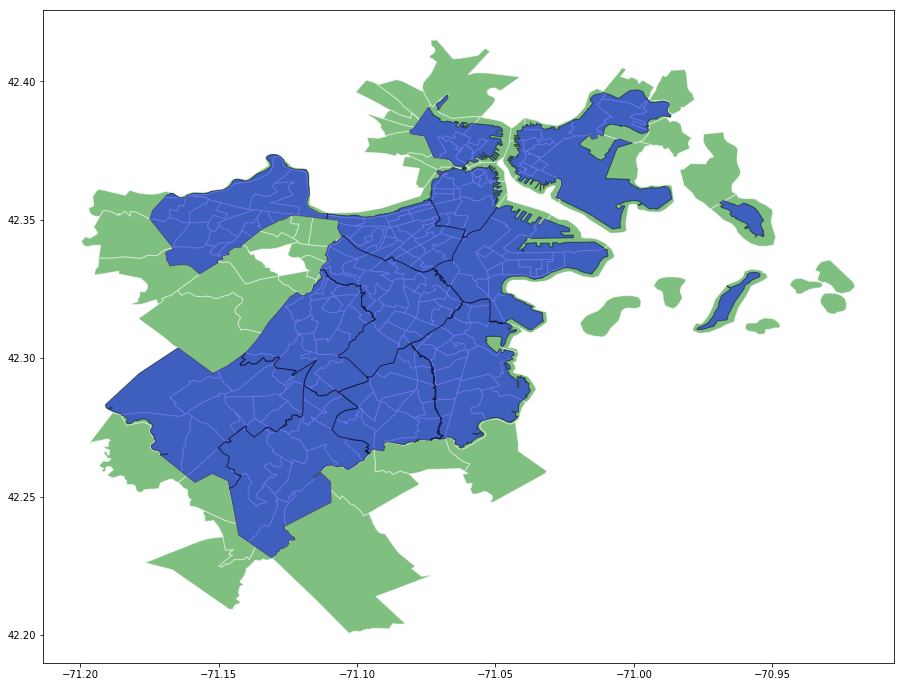

In [39]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.set_aspect('equal')

tracts.loc[relevant_geoids].plot(ax=ax, facecolor='green', edgecolor='white', alpha='0.5')
police_districts.plot(ax=ax, facecolor='blue', edgecolor='black', alpha=0.5)

## Check if missing any area

In [43]:
(police_districts.unary_union - tracts.loc[relevant_geoids].unary_union).area == 0

# perfect

True